In [51]:
import pandas as pd
blame_raw = pd.DataFrame([
    r"76d034edcf658 Documentation/scheduler/sched-pelt.c (Yuyang Du 2017-02-13 05:44:22 +0800   1) /*",
    r"76d034edcf658 Documentation/scheduler/sched-pelt.c (Yuyang Du (Corp) 2017-02-13 05:44:22 +0800   1) /*",
    r"76d034edcf658 Documentation/scheduler/sched-pelt.c (Yuyang Du 2017-02-13 05:44:22 +0800   1) /*"],
    columns=['raw'])
blame_raw

,raw
0,76d034edcf658 Documentation/scheduler/sched-pe...
1,76d034edcf658 Documentation/scheduler/sched-pe...
2,76d034edcf658 Documentation/scheduler/sched-pe...


In [52]:
PATH = r"C:/Temp/linux_blame.log"
PATH = r"C:\Users\Markus\Downloads\linux_blame_temp.tar.gz"
blame_raw = pd.read_csv(PATH, sep="\u0012", names=["raw"], encoding="latin-1")
blame_raw.head()

,raw
0,linux_blame_temp.log
1,NaN
2,889d0d42667c9 drivers/scsi/bfa/bfad_drv.h (Ani...
3,889d0d42667c9 drivers/scsi/bfa/bfad_drv.h (Ani...
4,7725ccfda5971 drivers/scsi/bfa/bfad_drv.h (Jin...


In [53]:
blame = \
  blame_raw.raw.str.extract(
      "(?P<sha>.*?) (?P<path>.*?) \((?P<author>.* ?) (?P<timestamp>[0-9]{4}-[0-9]{2}-[0-9]{2} [0-9]{2}:[0-9]{2}:[0-9]{2} .[0-9]{4}) *(?P<line>[0-9]*)\) .*",
      expand=True)
blame.head()

,sha,path,author,timestamp,line
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,2
3,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,3
4,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-23 17:46:15 -0700,4


In [54]:
print(len(blame))
blame = blame.dropna()
print(len(blame))
blame.head()

5665949
5665946


,sha,path,author,timestamp,line
2,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,2
3,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,3
4,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-23 17:46:15 -0700,4
5,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,5
6,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-23 17:46:15 -0700,6


In [55]:
blame['author'] = blame.author.str.strip()
blame['line'] = pd.to_numeric(blame.line)
blame.head()

,sha,path,author,timestamp,line
2,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,2
3,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,3
4,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-23 17:46:15 -0700,4
5,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 03:54:45 -0500,5
6,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-23 17:46:15 -0700,6


In [56]:
blame.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665946 entries, 2 to 5665947
Data columns (total 5 columns):
sha          object
path         object
author       object
timestamp    object
line         int64
dtypes: int64(1), object(4)
memory usage: 1.8 GB


In [57]:
blame.sha = pd.Categorical(blame.sha)
blame.path = pd.Categorical(blame.path)
blame.author = pd.Categorical(blame.author)
blame.timestamp = pd.Categorical(blame.timestamp)
blame.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665946 entries, 2 to 5665947
Data columns (total 5 columns):
sha          category
path         category
author       category
timestamp    category
line         int64
dtypes: category(4), int64(1)
memory usage: 171.7 MB


In [58]:
blame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5665946 entries, 2 to 5665947
Data columns (total 5 columns):
sha          category
path         category
author       category
timestamp    category
line         int64
dtypes: category(4), int64(1)
memory usage: 158.3 MB


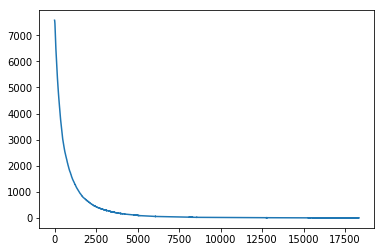

In [59]:
%matplotlib inline
blame.line.value_counts().plot()

In [60]:
blame.sha.nunique()

94957

In [61]:
blame.author.value_counts().head(10)

Linus Torvalds           838200
Hans Verkuil             118432
Mauro Carvalho Chehab    102107
Michael Chan              53945
Mike Marciniszyn          44843
Ralph Campbell            42453
Nicholas Bellinger        41823
Laurent Pinchart          40438
Antti Palosaari           40390
Alexander Duyck           39307
Name: author, dtype: int64

In [62]:
blame.path.nunique()

10235

In [63]:
blame.timestamp = pd.to_datetime(blame.timestamp.str.strip())

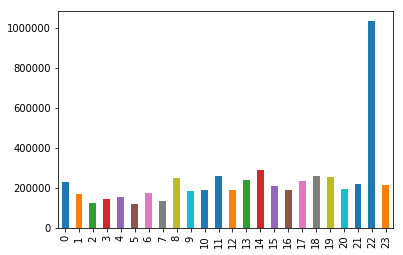

In [64]:
blame.timestamp.dt.hour.value_counts(sort=False).plot.bar()

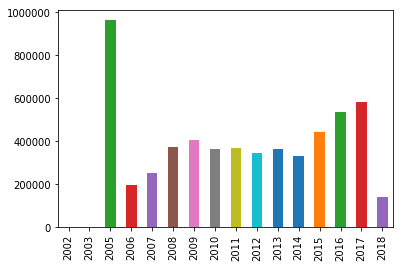

In [65]:
blame.timestamp.dt.year.value_counts(sort=False).plot.bar()

In [66]:
blame.timestamp.nsmallest()

771872   2002-04-09 19:14:34
771879   2002-04-09 19:14:34
771880   2002-04-09 19:14:34
771881   2002-04-09 19:14:34
771882   2002-04-09 19:14:34
Name: timestamp, dtype: datetime64[ns]

In [68]:
blame.head()

,sha,path,author,timestamp,line
2,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
3,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
4,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
5,889d0d42667c9,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5
6,7725ccfda5971,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,6


In [143]:
t = knowledge_loss.iloc[:2].timestamp

unix = t.astype('int64')
pd.to_datetime(unix)
unix


2    1448528085000000000
3    1448528085000000000
Name: timestamp, dtype: int64

In [152]:
knowledge_loss = blame[['path', 'author', 'timestamp', 'line']].copy()
knowledge_loss.author = knowledge_loss.author.str.split(",")[::-1].str.join("")
knowledge_loss.timestamp = knowledge_loss.timestamp.astype('int64')
knowledge_loss = knowledge_loss.reset_index(drop=True)
knowledge_loss.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
2,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
3,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5
4,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,6


In [153]:
#knowledge_loss.to_csv("linux_blame_log.csv", encoding='utf-8', index=None)

In [259]:
git_blame = pd.read_csv("linux_blame_log.csv")
git_blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [264]:
git_blame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         category
author       category
timestamp    datetime64[ns]
line         int64
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 109.9 MB


In [265]:
git_blame.path = pd.Categorical(git_blame.path)
git_blame.author = pd.Categorical(git_blame.author)
git_blame.timestamp = pd.to_datetime(git_blame.timestamp)
git_blame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         category
author       category
timestamp    datetime64[ns]
line         int64
dtypes: category(2), datetime64[ns](1), int64(1)
memory usage: 109.9 MB


In [266]:
df.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [171]:
a_year_ago = pd.Timestamp("now") - pd.DateOffset(years=1)
a_year_ago

Timestamp('2017-04-19 08:17:56.637322')

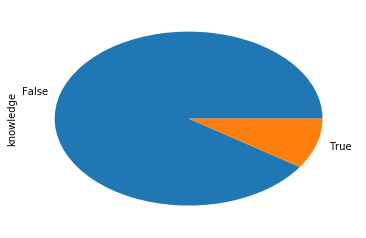

In [172]:
df['knowledge'] = df.timestamp >= a_year_ago
df.knowledge.value_counts().plot.pie()

In [268]:
df.kno

KeyError: 'knowledge'

In [212]:
knowledge = df[df.knowledge]
ratio = knowledge.groupby('author').line.count() / len(knowledge)
ratio.nlargest(10)

author
Anirudh Venkataramanan    0.035255
Daniel Scheller           0.031052
Yasunari Takiguchi        0.024187
Aviad Krawczyk            0.023526
Stanimir Varbanov         0.020556
Salil                     0.019973
Mika Westerberg           0.016489
Todor Tomov               0.015828
Jakub Kicinski            0.015367
Tomer Tayar               0.012627
Name: line, dtype: float64

In [182]:
knowledge = df[df.knowledge]
ratio = knowledge.groupby('author').line.count() / len(knowledge)
ratio.nlargest(10)

author
Anirudh Venkataramanan    0.035255
Daniel Scheller           0.031052
Yasunari Takiguchi        0.024187
Aviad Krawczyk            0.023526
Stanimir Varbanov         0.020556
Salil                     0.019973
Mika Westerberg           0.016489
Todor Tomov               0.015828
Jakub Kicinski            0.015367
Tomer Tayar               0.012627
Name: line, dtype: float64

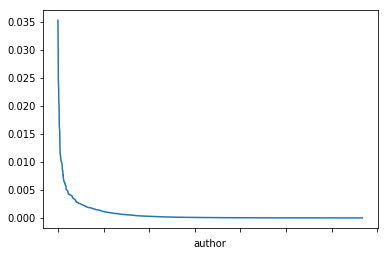

In [205]:
ratio.sort_values(ascending=False).plot()

In [211]:
ratio.describe()

count    1336.000000
mean        0.000749
std         0.002354
min         0.000002
25%         0.000011
50%         0.000063
75%         0.000457
max         0.035255
Name: line, dtype: float64

In [225]:
df['component'] = df.path.str.rsplit("/", n=1).str[0]
df.head()

,path,author,timestamp,line,knowledge,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,False,drivers/scsi/bfa
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,False,drivers/scsi/bfa
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,False,drivers/scsi/bfa
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,False,drivers/scsi/bfa
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,False,drivers/scsi/bfa


In [267]:
knowledge_ratio = df.groupby('component')[['knowledge']].mean()
knowledge_ratio.knowledge

KeyError: 'component'

In [246]:
df[df.path.str.startswith("drivers/media/common/videobuf")].sort_values(['path', 'line'])

,path,author,timestamp,line,knowledge,component
1728295,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,17,True,drivers/media/common/videobuf
1728296,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,18,True,drivers/media/common/videobuf
1728318,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,40,True,drivers/media/common/videobuf
1728615,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 14:16:47,337,True,drivers/media/common/videobuf
1728616,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 14:16:47,338,True,drivers/media/common/videobuf
1728617,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 14:16:47,339,True,drivers/media/common/videobuf
1728618,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 14:16:47,340,True,drivers/media/common/videobuf
1728747,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,469,True,drivers/media/common/videobuf
1728749,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,471,True,drivers/media/common/videobuf
1728752,drivers/media/common/videobuf/videobuf2-core.c,Mauro Carvalho Chehab,2017-12-28 16:29:37,474,True,drivers/media/common/videobuf
